# Task 1

## 1. Deriving the Logistic Regression Objective Function Using MLE (see reference[3])

Lets first generalize a binary classification problem with training data $ \{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^n $, where $ \mathbf{x}^{(i)} \in \mathbb{R}^d $ is the feature vector and $ y^{(i)} \in \{0, 1\} $ is the label for the $ i $-th data point.

Let's also assume the following:
- The data points are independent and identically distributed (i.i.d)
- The conditional probability of each label is:

$$
P(y = 1 \mid \mathbf{x}; \boldsymbol{\theta}) = \sigma(\mathbf{x}^\top \boldsymbol{\theta}) = \frac{1}{1 + e^{-\mathbf{x}^\top \boldsymbol{\theta}}}
$$

$$
P(y = 0 \mid \mathbf{x}; \boldsymbol{\theta}) = 1 - \sigma(\mathbf{x}^\top \boldsymbol{\theta})
$$

---

### Combinding our Conditional Probability Expressions

$$
P(y \mid \mathbf{x}; \boldsymbol{\theta}) =
\sigma(\mathbf{x}^\top \boldsymbol{\theta})^y \cdot (1 - \sigma(\mathbf{x}^\top \boldsymbol{\theta}))^{1 - y}
$$

This works because:
- If $ y = 1 $, then the expression becomes $ \sigma(\mathbf{x}^\top \boldsymbol{\theta}) $
- If $ y = 0 $, then it becomes $ 1 - \sigma(\mathbf{x}^\top \boldsymbol{\theta}) $

---

### Likelihood of the Dataset

If like in our original assumtion the data is i.i.d., the likelihood of the full dataset is the product of the individual probabilities:

$$
L(\boldsymbol{\theta}) = \prod_{i=1}^n P(y^{(i)} \mid \mathbf{x}^{(i)}; \boldsymbol{\theta}) =
\prod_{i=1}^n \left[
\sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta})^{y^{(i)}} \cdot (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))^{1 - y^{(i)}}
\right]
$$

---

### Log Likelihood 

To simplify the product to a sum we take the logarithm of the likelihood:

$$
\ell(\boldsymbol{\theta}) = \log L(\boldsymbol{\theta}) = \log \prod_{i=1}^n a_i = \sum_{i=1}^n \log a_i
$$

We can now substitue $a_i$ with our expression from earlier:

$$
a_i = \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta})^{y^{(i)}} \cdot (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))^{1 - y^{(i)}}
$$

Using $ \log(ab) = \log a + \log b $:

$$
\log a_i = y^{(i)} \log \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}) +
(1 - y^{(i)}) \log (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))
$$

Which gives us:

$$
\ell(\boldsymbol{\theta}) = \sum_{i=1}^n \left[
y^{(i)} \log \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}) +
(1 - y^{(i)}) \log (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))
\right]
$$

---

### Objective Function

Our goal is to maximize the log likelihood, However, as instructed in class we should we minimize the negative log likelihood:

$$
W(\boldsymbol{\theta}) = -\ell(\boldsymbol{\theta}) =
- \sum_{i=1}^n \left[
y^{(i)} \log \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}) +
(1 - y^{(i)}) \log (1 - \sigma(\mathbf{x}^{(i)\top} \boldsymbol{\theta}))
\right]
$$

## 2. MAP vs MLE (see reference [4])

### Maximum Likelihood Estimation (MLE)

- MLE chooses the parameters $ \boldsymbol{\theta} $ that make the observed data most likely
- MLE treats the parameters as fixed but unknown
- MLE does not include any prior beliefs about $ \boldsymbol{\theta} $

MLE can be defined mathematicaly as:

$$
\hat{\boldsymbol{\theta}}_{\text{MLE}} = \arg\max_{\boldsymbol{\theta}} \; P(\mathcal{D} \mid \boldsymbol{\theta})
$$

Where:
- $ \mathcal{D} $ is the dataset (with inputs $ \mathbf{X} $ and labels $ \mathbf{y} $),
- $ P(\mathcal{D} \mid \boldsymbol{\theta}) $ is the likelihood of the data given the parameters.

### Maximum A Posteriori Estimation (MAP)

MAP extends MLE by including a prior belief about the parameters. It uses Bayes’ theorem to compute a posterior distribution over parameters:

$$
P(\boldsymbol{\theta} \mid \mathcal{D}) = \frac{P(\mathcal{D} \mid \boldsymbol{\theta}) \cdot P(\boldsymbol{\theta})}{P(\mathcal{D})}
$$

MAP then chooses the parameters that maximize this:

$$
\hat{\boldsymbol{\theta}}_{\text{MAP}} = \arg\max_{\boldsymbol{\theta}} \; P(\boldsymbol{\theta} \mid \mathcal{D}) = \arg\max_{\boldsymbol{\theta}} \; P(\mathcal{D} \mid \boldsymbol{\theta}) \cdot P(\boldsymbol{\theta})
$$

Where:
- $ P(\boldsymbol{\theta}) $ is the prior distribution over parameters
- Note that as we dscussed if there is no prior knowledge $ P(\boldsymbol{\theta}) $ will a constant and MAP reduces to MLE

## 2. Machine Learning Problem and Model Justification (see reference [7])

### Problem Definition

The goal is to classify particle collision events as either **signal** (indicating potential Higgs boson production) or **background** (standard processes) where:

- `1` = signal event  
- `0` = background event  

### Why Logistic Regression?

- Logistic Regression is good for binary classification problems like this one.
- Logistic Regression gives us **probabilities**, such as an 80% chance that an event is a signal. This is particularly useful in this case, where decisions are often based on confidence levels rather than just yes/no.
- Many features in the collision data are alread numberic and **separable** making logisitic regression easier to implement.

### Comparison with Linear Support Vector Machine (Linear SVM)

#### Similarities:
- Both models attempt to draw a linear boundary between signal and background events.
- Both scale well with large datasets with many events and features.

#### Differences:
- Logistic regression provides **probabilistic outputs**, a linear SVM gives only a binary decision(yes/no).
- Logistic regression is designed to produce **probabilities**, a linear SVM focuses on **maximizing the gap between two classes**.
- Logistic regression generally handles **noisy** data better, a linear  SVMs can be more sensitive to **outliers**.


## 3. Dataset and Equation Correspondence

When we derived logistic regression, we defoined each training instance as $ (\mathbf{x}^{(i)}, y^{(i)}) $, where:

- $ \mathbf{x}^{(i)} $: a feature vector  
- $ y^{(i)}$: a binary label  
- $ \boldsymbol{\theta}$: model parameters

This maps directly to the HIGGS dataset:

- Each row in the dataset is a collision event, so $ i = 1 \rightarrow n $ with $ n \approx 11,000,000 $
- The feature vector $ \mathbf{x}^{(i)} $ consists of 28 features per event including momentum, transverse energy, etc
- The label $ y^{(i)} $ is binary: `1` for signal, `0` for background

### Modeling Assumptions

- We assume each event is i.i.d which is reasonable given the simulation based nature of the data


# Task 2

## 1. Dataset Selection

I chose to work with the **HIGGS dataset** from the UCI Machine Learning Repository.

- **Dataset link**: [https://archive.ics.uci.edu/dataset/280/higgs](https://archive.ics.uci.edu/dataset/280/higgs)
- **Instances**: 11,000,000
- **Features**: 28 per event
- **Target**: Binary classification
  - `1` = signal event 
  - `0` = background event

## 2. Perform Exploratory Data Analysis (EDA) (see reference [9])

### Impact of Multicollinearity 

Multicollinearity occurs when two or more input features are highly linearly correlated. This can cause some issues including, but not limited to:

- Difficulty in interpreting feature importance
- Potential overfitting or reduced model generalization

To fix this, we will apply a **Variance Inflation Factor (VIF)** to indentify the degree of multicollinearity between features so we can address it.

### VIF calculations

The VIF measures how much the variance of regression coefficient increases due to multicollinearity. The calculation for it is as follows:

$$
\text{VIF}(x_i) = \frac{1}{1 - R_i^2}
$$

Where:
- $x_i$ is the $i$-th feature
- $R_i^2$ is the coefficient of determination which we can obtain by regressing $x_i$ on all other features

Here is a rought evaluation of VIF values:
- $\leq 1$ indicates no multicollinearity
- $> 5$ indicates moderate multicollinearity
- $> 10$ indicates severe multicollinearity

### Steps Taken to Address Multicolliniarity via VIF 

1. Load a 100,000 row subset of the HIGGS dataset to save memory and time.
2. Standardized all features so, for example, a feature with a max of `10,000` cannot outweight a feature with a max of `50`.
3. Computed VIF scores using `statsmodels` to identify features with high multicollinearity.
4. Removed features with `VIF > 10` as they would have severe multicollinearity.

> **Note:** This is a simple way to reduce multicollinearity. Removing features can lead to information loss and reduce model performance. More advanced approaches exist but it is not used here for simplicity and time constraints on this assignment. If I have time to revisit this assignment I will update this method.

In [11]:
# Note: Assume this and all future kernals are running in under the hw01 directory unless specified otherwise 
# imports
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Name the columns as this data set does not come with the labels in the csv (see reference[13])
columns = [
    "label",
    "lepton_pT", "lepton_eta", "lepton_phi",
    "missing_energy_magnitude", "missing_energy_phi",
    "jet_1_pt", "jet_1_eta", "jet_1_phi", "jet_1_b_tag",
    "jet_2_pt", "jet_2_eta", "jet_2_phi", "jet_2_b_tag",
    "jet_3_pt", "jet_3_eta", "jet_3_phi", "jet_3_b_tag",
    "jet_4_pt", "jet_4_eta", "jet_4_phi", "jet_4_b_tag",
    "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"
]

# Load a subset of the HIGGS dataset
df = pd.read_csv("data/HIGGS.csv.gz", compression="gzip", names=columns, nrows=100_000)


# Separate target and features
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Function to calculate VIF
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Compute VIF and identify features with VIF > 10
vif_df = compute_vif(X_scaled)
high_vif_df = vif_df[vif_df["VIF"] > 10].sort_values("VIF", ascending=False)

# Print dropped features with their VIF
if not high_vif_df.empty:
    print("Removed features:")
    for _, row in high_vif_df.iterrows():
        print(f"- {row['feature']}: VIF = {row['VIF']:.2f}")
else:
    print("No features had VIF > 10.")

# Drop those features
X_reduced = X_scaled.drop(columns=high_vif_df["feature"].tolist())

# Add back target column and save
X_reduced["target"] = y.values
X_reduced.to_csv("data/HIGGS_subset_clean.csv", index=False)

print(f"\nSaved cleaned dataset with {X_reduced.shape[1] - 1} features to 'data/HIGGS_subset_clean.csv'")


No features had VIF > 10.

Saved cleaned dataset with 28 features to 'data/HIGGS_subset_clean.csv'


## 3. Visualize Feature Relationships (see reference[18])

### Techniques Used

1. **Pair Plot with Kernel Density Estimates (KDE) (also from documentation via reference [18])**  
   This technique should show the relationships between selected features and highlight the class separation between signal and background using KDE along the diagonals.

2. **Heatmap with Hierarchical Clustering**  (see reference[14])  
   This technique should displays the correlation matrix of features and show strongly correlated variables visually.


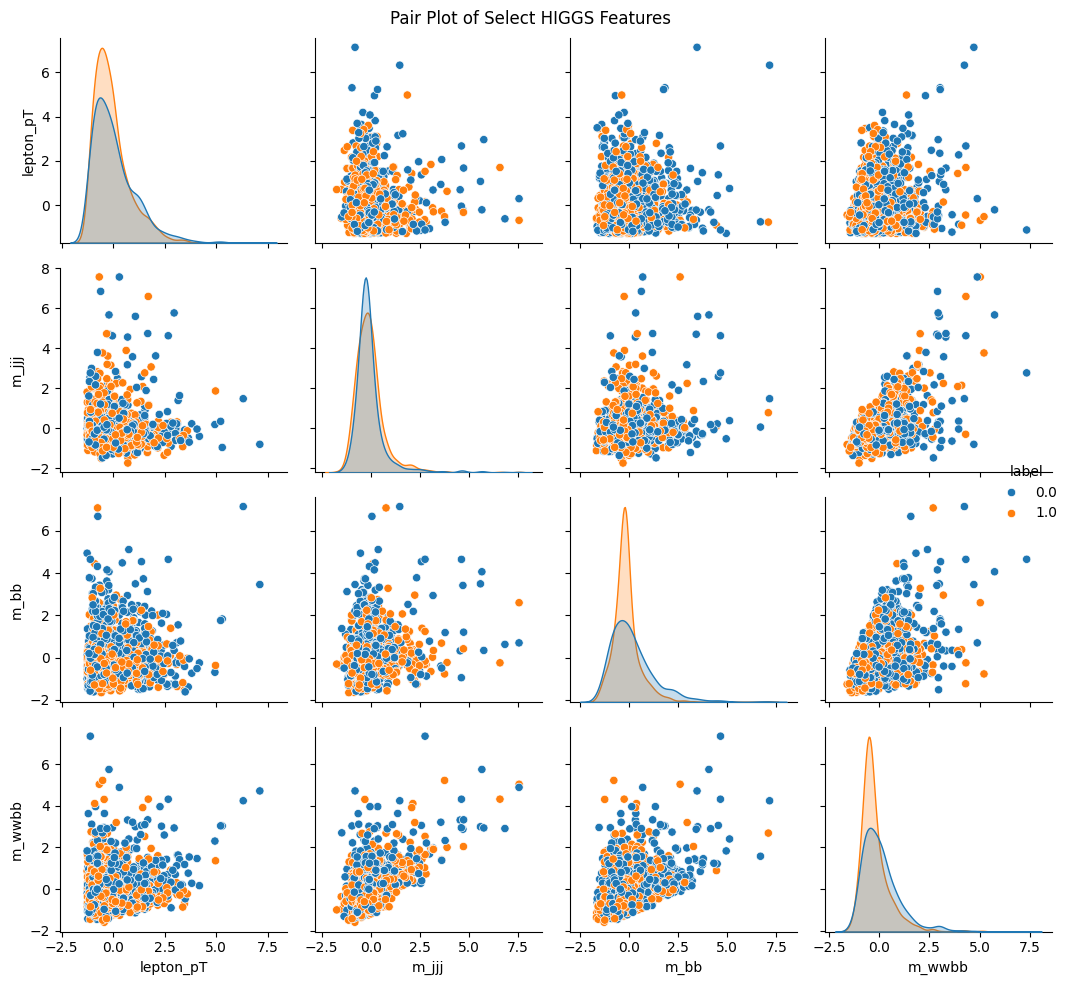

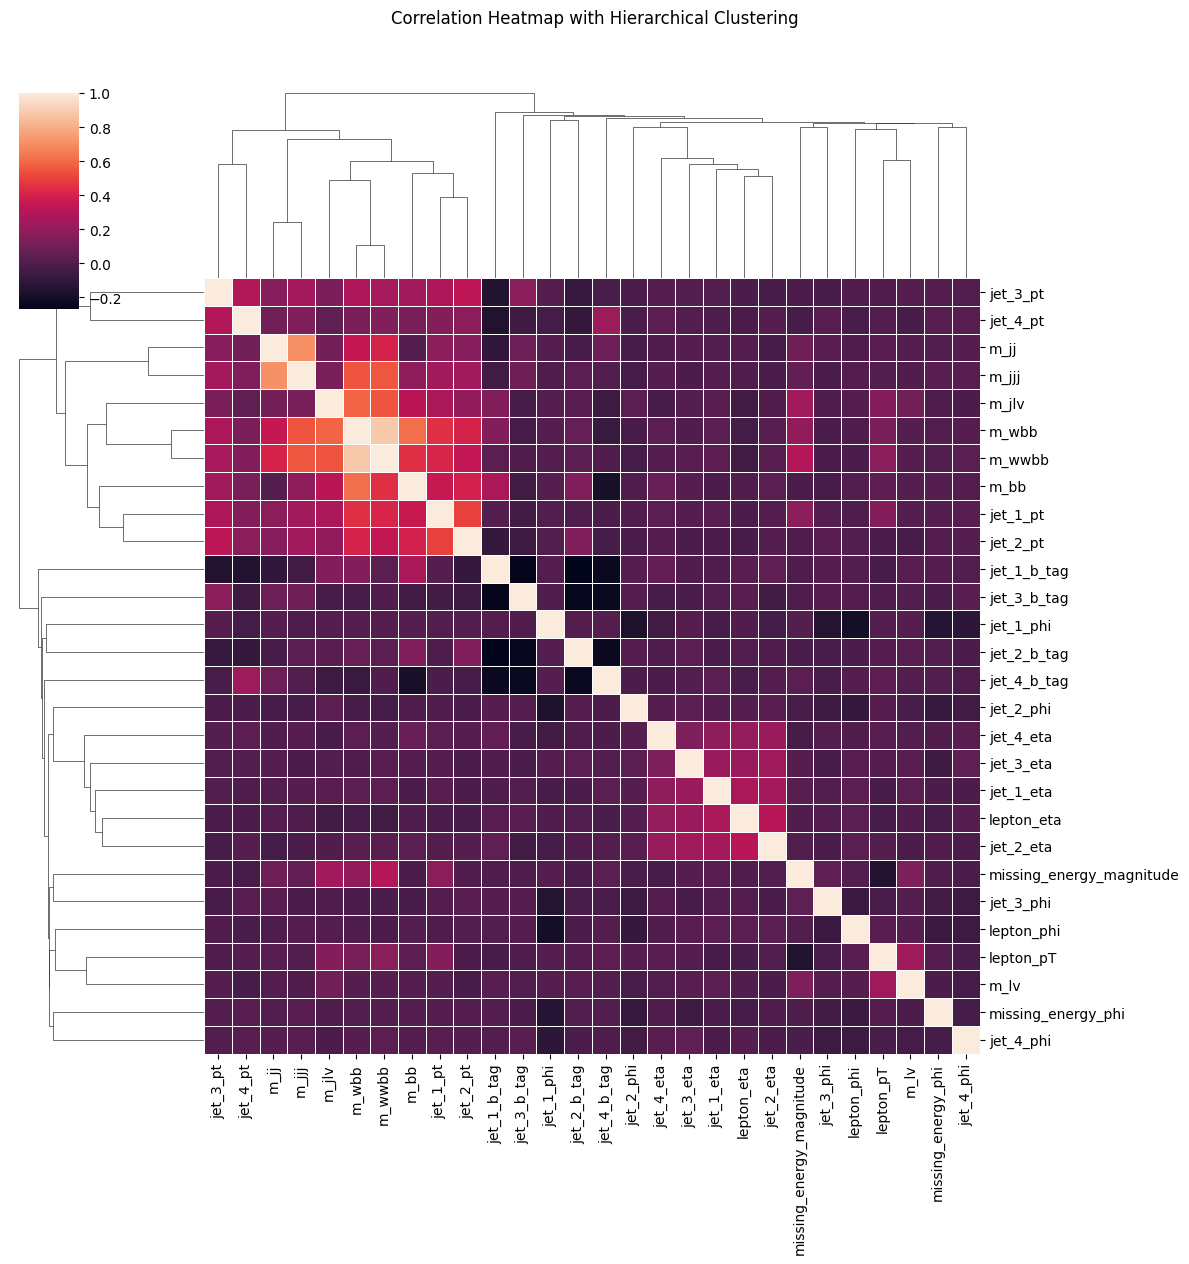

In [12]:
# imports
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

# Load the cleaned dataset
df = pd.read_csv("data/HIGGS_subset_clean.csv")

# Rename label column
df.rename(columns={"target": "label"}, inplace=True)

# Sample a smaller subset so our plots dont become to clustered
df_sample = df.sample(n=2000, random_state=42)

# Pair Plot with KDE 

# Random Selection of Features to compare (I was unsure how to pick feautres without having some intuitive knwoledge of what they actual represent)
selected_features = [
    "lepton_pT",
    "m_jjj",
    "m_bb",
    "m_wwbb",
    "label"
]

# Print Pairplot
sb.pairplot(df_sample[selected_features], hue="label", diag_kind="kde")
plt.suptitle("Pair Plot of Select HIGGS Features")
plt.tight_layout()
plt.show()

# Correlation Heatmap with Feature Clustering

# Drop the label column for correlation matrix
features_only = df_sample.drop(columns=["label"])

# Compute correlation matrix
corr = features_only.corr()

# Create hierarchical clustering linkage
linkage = hierarchy.linkage(corr, method="average")

# Create clustered heatmap
g = sb.clustermap(
    corr,
    linewidths=0.5,
    figsize=(12, 12),
    row_linkage=linkage,
    col_linkage=linkage,
)

# Print Heatmap
plt.suptitle("Correlation Heatmap with Hierarchical Clustering", y=1.05)
plt.show()


### Interpretation of Visualizations

#### Pair Plot
- The diagonal KDE plots show slight differences in the shape and position of the class distributions but are most noticable for `m_bb` and `m_wwbb`.
- Most scatter plots show significant overlap between classes

#### Correlation Heatmap
- Some features are strongly correlated with each other (These expectedly include the engineered ones like `m_wbb`, `m_wwbb`, and `m_jlv`)
- Other features  like `missing_energy_phi` are less correlated and may offer unique information.


# Task 3

## 1. Implementation of Logitic Regression 

In [13]:
import numpy as np

class LogisticRegressionSelfImplement:
    def __init__(self, learning_rate=0.01, num_iters=1000, batch_mode="batch", batch_size=32):

        # Initialize the logistic regression model with the following parameters
        # - learning_rate: Step size for gradient descent updates
        # - num_iters: Number of training iterations
        # - batch_mode: 'batch', 'stochastic', or 'mini-batch' to select gradient descent variant
        # - batch_size: Size of mini-batches if selected
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.batch_mode = batch_mode
        self.batch_size = batch_size

        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # Standard to avoid log(0)
        epsilon = 1e-15 
        # Cost function dervied from Task 1
        return -np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    def fit(self, X, y):
        # Train the model using the selected gradient descent strategy
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iters):
            # see reference [17]
            if self.batch_mode == "batch":
                # Use the full dataset each iteration
                X_batch, y_batch = X, y

            # see reference [15]
            elif self.batch_mode == "stochastic":
                # Use one random sample each iteration
                rand_index = np.random.randint(m)
                X_batch = X[rand_index:rand_index+1]
                y_batch = y[rand_index:rand_index+1]

            # see reference [16]
            elif self.batch_mode == "mini-batch":
                # Use a random subset of the data each iteration
                rand_index = np.random.choice(m, self.batch_size, replace=False)
                X_batch = X[rand_index]
                y_batch = y[rand_index]

            # Forward pass
            z = np.dot(X_batch, self.weights) + self.bias
            h = self.sigmoid(z)
            cost = self.cost_function(h, y_batch)
            self.loss_history.append(cost)

            # Gradient calculation
            dw = np.dot(X_batch.T, (h - y_batch)) / X_batch.shape[0]
            db = np.sum(h - y_batch) / X_batch.shape[0]

            # Parameter update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_probability(self, X):
        # Compute predicted probabilities
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        # Predict class labels based on a threshold of 0.5 or 50% unless otherwise specified by user
        return (self.predict_probability(X) >= threshold).astype(int)


### 2. Convergence Properties of Gradient Descent Variants Implemented Above

- **Batch Gradient Descent:(see reference [17])**  
  Uses the full dataset per update leading to a stable but slow convergence.

- **Stochastic Gradient Descent: (see reference [15])**  
  Updates with one sample at a time leading to a fast but noisy and less stable convergence.

- **Mini-Batch Gradient Descent: (see reference [16])**  
  Updates with small batches leading to a convergence that is faster than BGD and smoother than SGD.


# Task 4

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import tracemalloc  # (see source [22])

# Load the cleaned HIGGS data
data = pd.read_csv("data/HIGGS_subset_clean.csv")
y = data["target"]
X = data.drop(columns=["target"])

# Convert to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the logistic regression model using nn.Linear layer (see source [19])
class LogisticRegressionTorch(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Create evaluation function to get accuracy, precision, recall, and F1 score (see source [20])
def evaluate_model(model, X_eval, y_eval):
    model.eval()
    with torch.no_grad():
        outputs = model(X_eval)
        predictions = (outputs > 0.5).float()
        acc = accuracy_score(y_eval, predictions)
        prec = precision_score(y_eval, predictions)
        rec = recall_score(y_eval, predictions)
        f1 = f1_score(y_eval, predictions)
    return acc, prec, rec, f1

# Create function to train using a selected optimizer and hyperparameters (see source [21])
def train_model(optimizer_type, learning_rate, input_dim, epochs):
    model = LogisticRegressionTorch(input_dim)
    criterion = nn.BCELoss()  # Use Binary cross entropy loss for binary classification since this is what was spoken about most in class

    # Choose optimizer based on input string
    if optimizer_type == 'Momentum':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_type == 'RMSProp':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Training loop for given number of epochs
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    return evaluate_model(model, X_test, y_test)

# Run tuning for multiple learning rates and epochs
optimizers = ['Momentum', 'RMSProp', 'Adam']
learning_rates = [0.1, 0.05, 0.01, 0.001, 0.0001]
epoch_options = [100, 200, 300]
results = []  

# Loop through each optimizer configuration and track metrics and resource usage
for opt in optimizers:
    for lr in learning_rates:
        for epoch_count in epoch_options:
            start_time = time.time()  # Start runtime timer
            tracemalloc.start()  # Begin memory tracking

            acc, prec, rec, f1 = train_model(opt, lr, X_train.shape[1], epoch_count)

            # Stop memory and time tracking
            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            runtime = time.time() - start_time

            # Store all results for this configuration
            results.append({
                'Optimizer': opt,
                'Learning Rate': lr,
                'Epochs': epoch_count,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1 Score': f1,
                'Runtime (s)': round(runtime, 3),
                'Peak Memory (MB)': round(peak / 1_000_000, 3)
            })

# Convert tensors to numpy arrays for use with Task 3 model
X_train_np = X_train.numpy()
y_train_np = y_train.numpy().flatten()
X_test_np = X_test.numpy()
y_test_np = y_test.numpy().flatten()

# Test custom SGD with same tuning grid as other optimizers
for lr in learning_rates:
    for epoch_count in epoch_options:
        start_time = time.time()  # Start runtime timer
        tracemalloc.start()  # Begin memory tracking

        # Create and train instance of the SGD model from Task 3
        task3_model = LogisticRegressionSelfImplement(learning_rate=lr, num_iters=epoch_count, batch_mode='batch')
        task3_model.fit(X_train_np, y_train_np)
        y_pred_task3 = task3_model.predict(X_test_np)

        # Evaluate predictions
        acc = accuracy_score(y_test_np, y_pred_task3)
        prec = precision_score(y_test_np, y_pred_task3)
        rec = recall_score(y_test_np, y_pred_task3)
        f1 = f1_score(y_test_np, y_pred_task3)

        # Stop memory and time tracking
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        runtime = time.time() - start_time

        # Store results for this configuration
        results.append({
            'Optimizer': 'Custom SGD',
            'Learning Rate': lr,
            'Epochs': epoch_count,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'Runtime (s)': round(runtime, 3),
            'Peak Memory (MB)': round(peak / 1_000_000, 3)
        })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
results_df


,Optimizer,Learning Rate,Epochs,Accuracy,Precision,Recall,F1 Score,Runtime (s),Peak Memory (MB)
0,Momentum,0.1000,100,0.63515,0.631609,0.739571,0.681340,0.150,0.544
1,Momentum,0.1000,200,0.63790,0.634085,0.741088,0.683424,0.284,0.537
2,Momentum,0.1000,300,0.63870,0.634538,0.742700,0.684371,0.409,0.537
3,Momentum,0.0500,100,0.62760,0.626345,0.728479,0.673562,0.142,0.536
4,Momentum,0.0500,200,0.63385,0.630641,0.737960,0.680093,0.281,0.537
5,Momentum,0.0500,300,0.63700,0.633182,0.740994,0.682859,0.383,0.537
6,Momentum,0.0100,100,0.61560,0.612990,0.735495,0.668678,0.154,0.536
7,Momentum,0.0100,200,0.62010,0.618398,0.730375,0.669738,0.263,0.536
8,Momentum,0.0100,300,0.62385,0.622678,0.727816,0.671154,0.403,0.536
9,Momentum,0.0010,100,0.52765,0.548635,0.588737,0.567979,0.136,0.536


### Practical Trade Offs Between Optimization Algorithms

#### Adam
- Consistently produced the highest F1 scores across most configurations.
- Performed best at learning rates between $0.01$–$0.1$.
- Fast and low memory usage (runtime $\approx 0.17$–$0.47$ seconds, memory $\approx 0.54$ MB).
- Slightly outperformed other optimizers in both accuracy and consistency.

#### RMSProp
- Best results around learning rate $0.01$ (F1 $\approx 0.68$).
- Struggled at lower learning rates (F1 $< 0.5$ at $0.0001$).
- Fast and low memory usage

#### Momentum
- Performance was erratic and varied significantly with learning rate and epochs.
- At $0.1$ learning rate, some runs matched Adam (F1 $\approx 0.684$).
- Lower learning rates led to large performance drops.
- `Note: I ran this cell multiple times and sometimes event 0 had abnormal memory (62 MB) and runtime (4 s). I am currently unsure of the cause.`

#### Custom SGD
- Performed well with higher learning rates (F1 $\approx 0.67$ at $0.1$)
- Easy to understand and implement as code is visable and we can trace potential bugs
- Runtime and memory much higher (up to $\approx 1.8$ seconds and $\approx 20$ MB).
- As it is implemented with Python and has no optimized backend it cannot compete with the pytorch options.


## References

1. Cornell University. (n.d.). *Logistic Regression*. CS 4780: Machine Learning.  
   Retrieved from https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html

2. Murphy, K. P. (2022). *Probabilistic Machine Learning: An Introduction*. MIT Press.  
   Retrieved from https://www.cs.ubc.ca/~murphyk/PMLbook/book1.html

3. NucleusBox. (n.d.). *Cost Function in Logistic Regression – Understanding the Theory Behind the Loss*.  
   Retrieved from https://www.nucleusbox.com/cost-function-in-logistic-regression/

4. Schmidt, M. (2017). *MLE and MAP Estimation* [Lecture slides]. CPSC 340, University of British Columbia.  
   Retrieved from https://www.cs.ubc.ca/~schmidtm/Courses/340-F17/L25.pdf

5. University of Pennsylvania. (n.d.). *Logistic Regression - CIS 520 Machine Learning*.  
   Retrieved from https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=Lectures.Logistic

6. Wu, S. (n.d.). *Lecture 5: Logistic Regression* [PDF]. CSCI 5525 - Machine Learning, University of Minnesota.  
   Retrieved from https://zstevenwu.com/courses/s20/csci5525/resources/slides/lecture05.pdf
   
7. Cortes, C., & Vapnik, V. (1995). *Support-vector networks*. Machine Learning, 20(3), 273–297.  
   Retrieved from https://doi.org/10.1007/BF00994018

8. QuickRef. (n.d.). *LaTeX Math Symbols Cheat Sheet*.  
   Retrieved from https://quickref.me/latex.html

9. Investopedia. (2025). *Variance Inflation Factor (VIF)*.    
   Retrieved from https://www.investopedia.com/terms/v/variance-inflation-factor.asp

10. PyTorch. (2025). *PyTorch Documentation (Stable)*.   
    Retrieved from https://docs.pytorch.org/docs/stable/index.html

11. pandas. (2025). *pandas Documentation*.  
    Retrieved from https://pandas.pydata.org/docs/

12. Statsmodels. (2025). *Statsmodels Documentation (Stable)*.    
    Retrieved from https://www.statsmodels.org/stable/index.html

13. Weichert, N. (2019). *Identifying Higgs Bosons from Background Noise (with PySpark)*.   
    Retrieved from https://medium.com/data-science/identifying-higgs-bosons-from-background-noise-pyspark-d7983234207e

14. Galella, S. (2021). *Correlation Heatmaps with Hierarchical Clustering*.  
    Retrieved from https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-
    
15. GeeksforGeeks. (2023). *Stochastic Gradient Descent (SGD) in Machine Learning*.  
    Retrieved from https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

16. GeeksforGeeks. (2023). *Mini-Batch Gradient Descent in Deep Learning*.  
    Retrieved from https://www.geeksforgeeks.org/mini-batch-gradient-descent-in-deep-learning/

17. GeeksforGeeks. (2023). *Gradient Descent Algorithm and Its Variants*.  
    Retrieved from https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/

18. Seaborn. (2024). *Seaborn API Reference*.  
    Retrieved from https://seaborn.pydata.org/api.html

19. PyTorch. (2025). *torch.optim — Optimizers*.  
    Retrieved from https://pytorch.org/docs/stable/optim.html

20. scikit-learn. (2025). *sklearn.metrics — Evaluation Metrics*.  
    Retrieved from https://scikit-learn.org/stable/api/sklearn.metrics.html

21. scikit-learn. (2025). *Grid Search API Reference*.  
    Retrieved from https://scikit-learn.org/stable/modules/grid_search.html

22. Python Software Foundation. (2025). *tracemalloc — Trace memory usage*.  
    Retrieved from https://docs.python.org/3/library/tracemalloc.html
